In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import joblib # type: ignore

# Data Gathering

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.to_csv('farmer.csv',index=False)

# Data Preparation

In [4]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
group = df.groupby('label')

In [6]:
group[['N']].mean()

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
Nitrogen = group['N'].agg(min_nitro='max',avg_nitro='mean')
Nitrogen

,min_nitro,avg_nitro
label,,
apple,40,20.80
banana,120,100.23
blackgram,60,40.02
chickpea,60,40.09
coconut,40,21.98
coffee,120,101.20
cotton,140,117.77
grapes,40,23.18
jute,100,78.40


In [10]:
Nitrogen.reset_index(inplace=True)

c:\Users\Anil sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


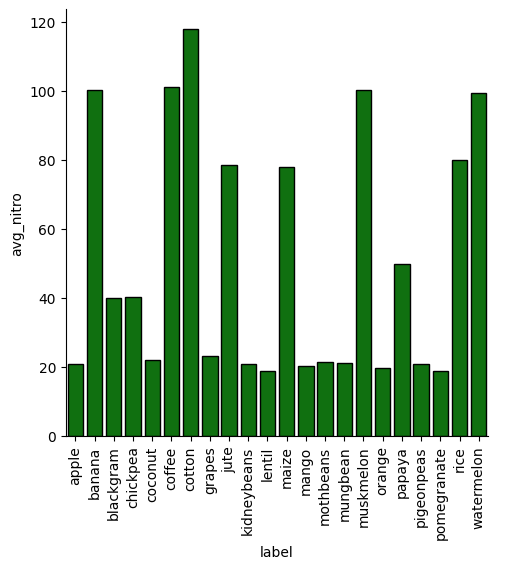

In [11]:
sns.catplot(x='label',y='avg_nitro',data=Nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

c:\Users\Anil sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


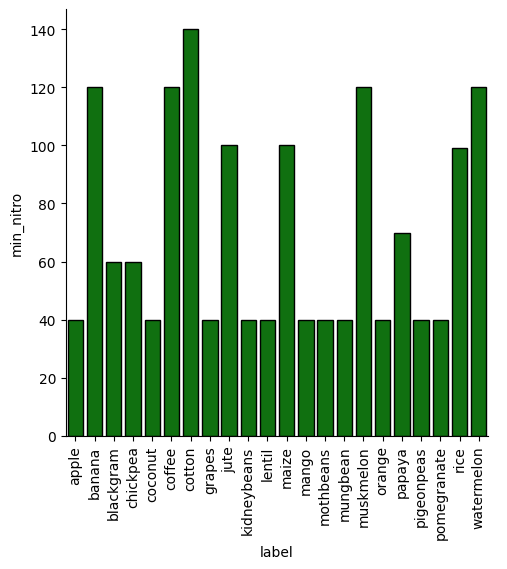

In [12]:
sns.catplot(x='label',y='min_nitro',data=Nitrogen,kind='bar',ec='k',color='g') # edge color --> ec
plt.xticks(rotation=90)
plt.show()

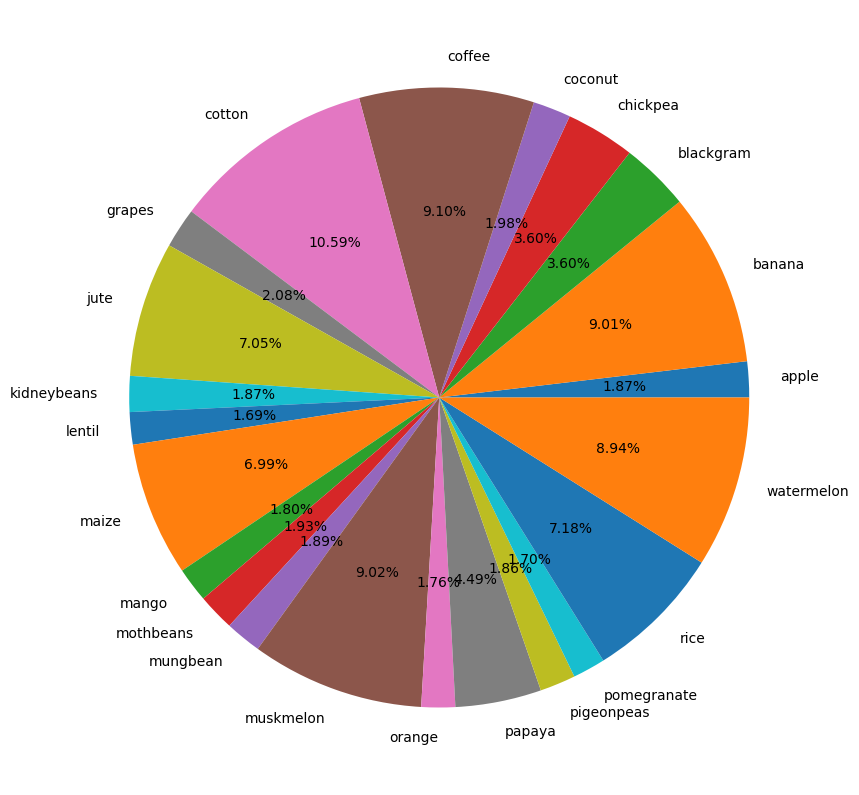

In [15]:
crops_label = list(Nitrogen['label'])
avg_nitrogen = list(Nitrogen['avg_nitro'])

plt.figure(figsize=(10,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

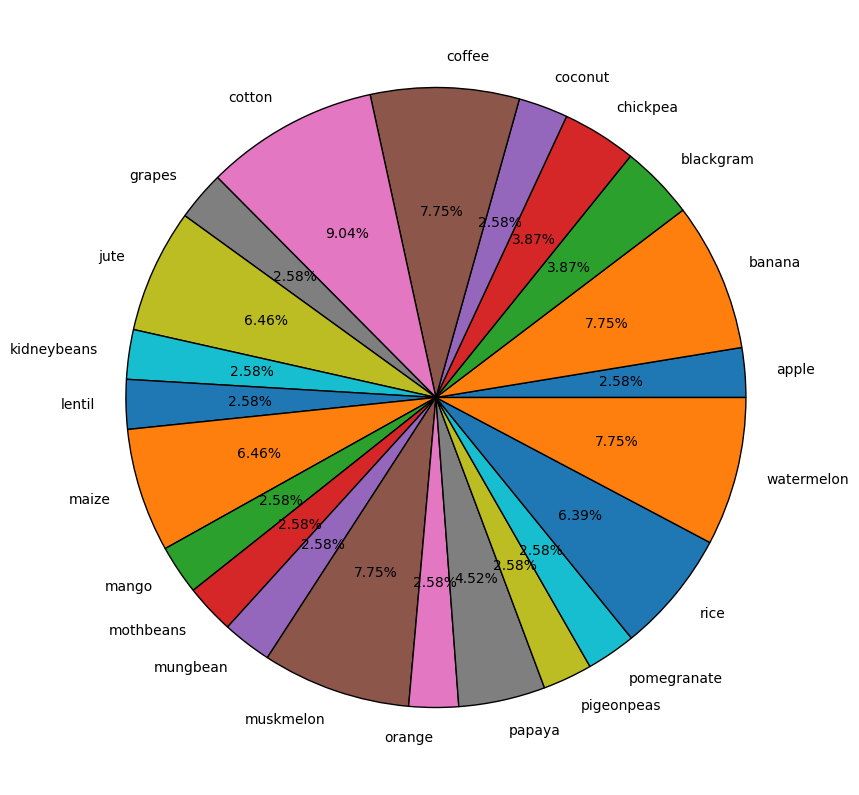

In [17]:
crops_label = list(Nitrogen['label'])
min_nitrogen = list(Nitrogen['min_nitro'])

plt.figure(figsize=(10,24))
plt.pie(min_nitrogen,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'k'})
plt.show()

In [18]:
x = df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


* Check missing values

In [19]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [20]:
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

* Check duplicates

In [21]:
df.duplicated().sum()

0

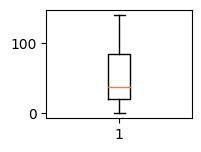

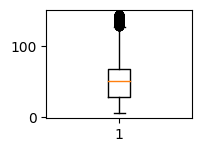

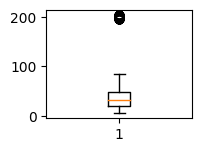

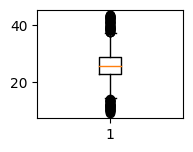

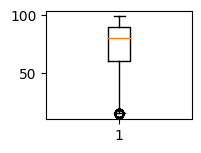

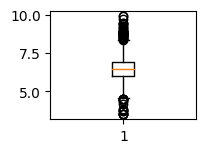

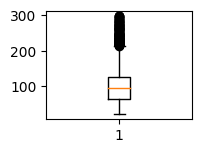

In [22]:
i = 1
for col in x.columns:
    plt.subplot(3,3,i)
    plt.boxplot(x[col])
    i+=1
    plt.show()

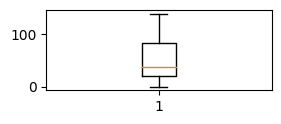

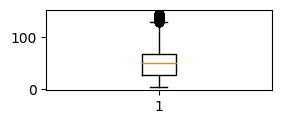

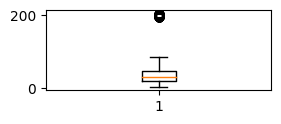

In [24]:
plt.subplot(4,2,1)
plt.boxplot(df['N'])
plt.show()

plt.subplot(4,2,2)
plt.boxplot(df['P'])
plt.show()

plt.subplot(4,2,3)
plt.boxplot(df['K'])
plt.show()

# Model Enginneering


1. **StandardScaler**:
   - **Why?** It's used to make features have a mean of 0 and a standard deviation of 1 (standard normal distribution).
   - **When?** Useful when algorithms assume that features are normally distributed.
   - **Example**: Imagine adjusting the height of everyone in a group so that the average height becomes 0 and the variation is consistent.

2. **MinMaxScaler**:
   - **Why?** Scales features to a specific range (usually [0, 1]).
   - **When?** Useful when features have different scales and you want them all within a common range.
   - **Example**: Think of it like resizing a photo to fit within a specific frame.

3. **RobustScaler**:
   - **Why?** Resistant to outliers; uses the median and interquartile range.
   - **When?** When outliers are present, it's better than StandardScaler.
   - **Example**: Imagine calculating the average income of a group using the middle income value (median) instead of the mean.



In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler , Normalizer
std = StandardScaler()

## Data Normalization

In [27]:
x_transform = std.fit_transform(x)

In [28]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [29]:
x_transform

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [30]:

x_transform.shape[0]

2200

In [31]:
x.shape[0]

2200

 KMeans clustering:

1. **Importing KMeans**:
   - You've imported the `KMeans` class from the `sklearn.cluster` module. KMeans is a popular clustering algorithm.
   - It aims to partition data points into clusters based on similarity.

2. **Creating an Instance**:
   - You've created an instance of the `KMeans` class by calling `KMeans()`.
   - This instance will be used to fit the model to your transformed data.

3. **Fitting the Model**:
   - The `fit()` method is used to train the KMeans model on your transformed data (`x_transform`).
   - During training, KMeans identifies cluster centers and assigns data points to the nearest center.



In [32]:
from sklearn.cluster import KMeans
KMeans = KMeans()
KMeans.fit(x_transform)

KMeans()

# Model Evaluation

In [33]:
# TO returns an array of unique cluster labels assigned by the KMeans algorithm to each data point in your transformed dataset.
#  These labels represent the cluster membership for each observation.
np.unique(KMeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [34]:
df['cluster_no'] = KMeans.labels_

In [35]:
group_6 =df[df['cluster_no']==4]
group_6['label'].unique()


array(['grapes', 'apple'], dtype=object)

# Model Deployment

In [36]:
joblib.dump(KMeans,'kmodel.lb')
joblib.dump(std,'stds.lb')

['stds.lb']


- **Silhouette Score**:
  - Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
  - Ranges from -1 to 1:
    - **Positive values**: Better separation between clusters.
    - **Negative values**: Overlapping clusters.
    - **Close to 1**: Well-separated clusters.
  - Useful for assessing the appropriateness of the chosen number of clusters.



In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(x_transform,KMeans.labels_)

0.2981746840617085

In [38]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)